In [1]:
import random as r
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Node:
    def __init__(self, succ_rate, i, j):
        self.informed_status = 0  # Not informed
        self.succ_rate = succ_rate
        self.i = i
        self.j = j
        
    def send_data(self, node):
        attempt = node.get_data()
        return attempt
    
    def get_data(self):
        if self.informed_status == 0:
            self.informed_status = 1
            return True
        return False

In [28]:
class System:
    def __init__(self, n, succ_rate, radius):
        self.n = n
        self.succ_rate = succ_rate
        self.radius = radius
        self.informed = 0
        self.informed_steps = []
        self.A = []
        self.grid = [[Node(succ_rate, i, j) for j in range(n)] for i in range(n)]            
            
    def get_informed(self):
        informed_nodes = []
        for row in self.grid:
            for node in row:
                if node.informed_status == 1:
                    informed_nodes.append(node)
        return informed_nodes

        
    def data_transfer(self):                    
        while self.informed < n**2:
            source = self.grid[r.randint(0, self.n-1)][r.randint(0, self.n-1)]
            while source.informed_status == 0:
                source = self.grid[r.randint(0, self.n-1)][r.randint(0, self.n-1)]
            neighbors = []
            for x in range(source.i-radius,source.i+(radius+1)):
                for y in range(source.j-radius, source.j+(radius+1)):
                    try:
                        neighbors.append(self.grid[x][y])
                    except:
                        break
            
            target = neighbors[r.randint(0,len(neighbors)-1)]
            die = r.randint(1, 99)
            succ_dt = target.get_data()
            if succ_dt:
                self.informed += 1                
            self.informed_steps.append(self.informed)
            self.A.append(self.informed/self.n**2)     
        print((len(self.informed_steps)))
            
    def __str__(self):
        msg = ""
        for i in self.grid:
            for j in i:
                msg += str(j.informed_status) + " "
            msg += "\n"
        return msg
    
    def get_grid(self):
        return self.grid
    
    def patient_zero(self):
        p0 = self.grid[r.randint(0,self.n-1)][r.randint(0,self.n-1)]
        p0.get_data()
        self.informed += 1
        self.informed_steps.append(self.informed)
    


10799


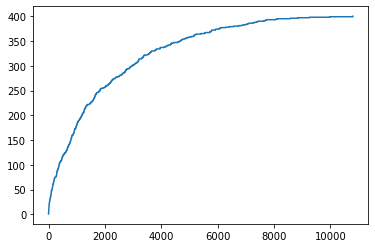

In [39]:
for n in [20]:
#     for succ in [100, 80, 30]:
    succ = 100
    radius = 1
    system = System(n, succ, radius)
    system.patient_zero()
    system.data_transfer()
    plt.plot(system.informed_steps)
    plt.show()

87


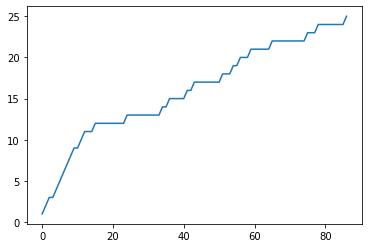

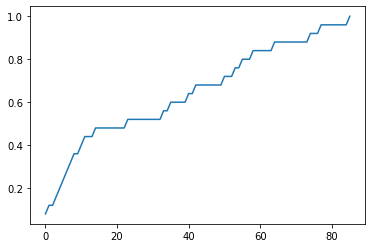

896


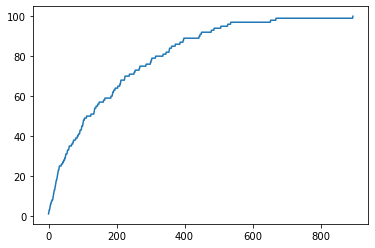

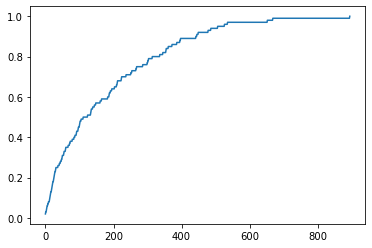

27703


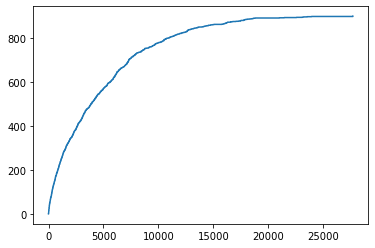

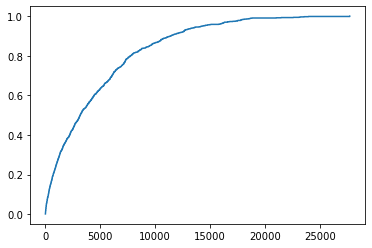

101984


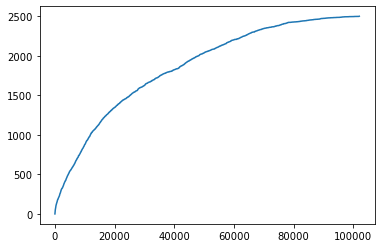

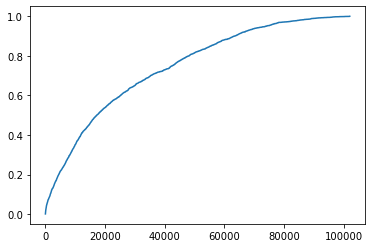

In [41]:
for n in [5, 10, 30, 50]:
#     for succ in [100, 80, 30]:
    succ = 100
    radius = 1
    system = System(n, succ, radius)
    system.patient_zero()
    system.data_transfer()
    plt.plot(system.informed_steps)
    plt.show()
    plt.plot(system.A)
    plt.show()